In [ ]:
We will try to analyze all variables present in the dataset and check whether which feature is the most responsible for decrease in the price of a car over a period of year.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv("cardekho_dataset.csv")
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
On looking at the data it is noted that we have both the present price and the selling price of the car. Although their might be a difference in purhcase prices depending upon which year the car was purchased, however that can be neglibible as no extreme variation is ever seen in car purchase price.

In [ ]:
Now lets create a seprate column giving us the depreciation of each car and add the column to our main data frame

In [5]:
car_depreciation = cars['Present_Price'] - cars['Selling_Price']
cars['depreciation'] = car_depreciation
car_depreciation

0      2.24
1      4.79
2      2.60
3      1.30
4      2.27
5      0.58
6      1.37
7      2.11
8      0.14
9      1.47
10     0.75
11     3.53
12     2.44
13     1.61
14     4.96
15     3.04
16     3.54
17     3.04
18     1.84
19     5.33
20     1.10
21     0.81
22     3.61
23     0.96
24     1.51
25     1.99
26     1.72
27     0.49
28     2.00
29     2.93
       ... 
271    7.00
272    2.50
273    5.25
274    1.50
275    2.70
276    4.95
277    3.90
278    2.40
279    7.35
280    0.65
281    5.50
282    5.75
283    2.81
284    2.40
285    1.10
286    2.25
287    1.75
288    5.20
289    3.49
290    1.90
291    0.70
292    2.00
293    6.65
294    3.05
295    4.54
296    2.10
297    1.90
298    7.65
299    1.00
300    0.60
Length: 301, dtype: float64

In [ ]:
Now we know exactly how much depreciation has happened for every car. Also we need to represent this by cars name and not by serial number. So lets make a seprate dataset and include the variables we are going to use to visualise our data which would help us see which car has the best and worst re-sale values

In [6]:
depr = cars[['Car_Name', 'depreciation']]
depr.head()

,Car_Name,depreciation
0,ritz,2.24
1,sx4,4.79
2,ciaz,2.60
3,wagon r,1.30
4,swift,2.27


In [ ]:
# Using group by and then sorting it in descending order gives us the car with the maximum depreciation

In [7]:
grouped = depr.groupby('Car_Name').mean()
grouped.sort_values('depreciation', ascending=False)

,depreciation
Car_Name,
land cruiser,57.600000
camry,21.230000
fortuner,12.047273
corolla,10.850000
corolla altis,10.399375
innova,5.068889
sx4,4.908333
city,4.372692
etios cross,3.333333


In [9]:
cars['Car_Name'].value_counts().head(10)

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
innova            9
ciaz              9
i20               9
grand i10         8
amaze             7
Name: Car_Name, dtype: int64

In [ ]:
Lets analyse why other cars have such high depreciation and analyze some cars indvidually

In [10]:
temp = cars.loc[cars['Car_Name'] == 'fortuner']
temp.head(11)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,15.71
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,14.61
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0,15.97
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0,12.46
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0,3.23
67,fortuner,2010,9.25,20.45,59000,Diesel,Dealer,Manual,0,11.20
79,fortuner,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0,16.11
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61


In [ ]:
Now lets plot the same on a bar graph using matplotlib which will give us an better understanding of depreciation of fortuner for its make year

Text(0, 0.5, 'Depreciation in lacs')

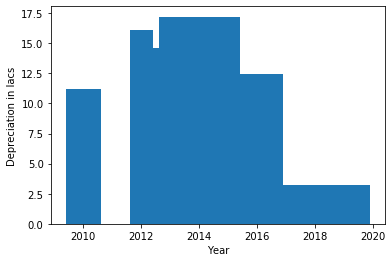

In [11]:
plt.bar(x = temp['Year'], height=temp['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

In [ ]:
Lets try to do the same for other cars as well

In [12]:
temp_1 = cars.loc[cars['Car_Name'] == 'city']
temp_1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
251,city,2013,5.00,9.9,56701,Petrol,Dealer,Manual,0,4.90
253,city,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0,2.70
254,city,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0,4.65
256,city,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0,3.35
257,city,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0,5.10


Text(0, 0.5, 'Depreciation in lacs')

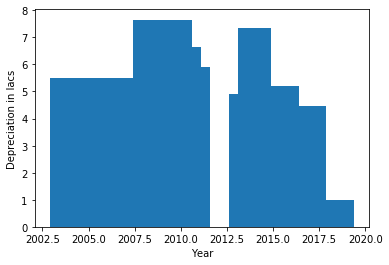

In [13]:
plt.bar(x = temp_1['Year'], height=temp_1['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

In [ ]:
The above graph gives us an idea about depreciation of city over its make year, which is also not constant

In [15]:
temp_2 = cars.loc[cars['Car_Name'] == 'corolla altis']
temp_2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
55,corolla altis,2009,3.60,15.04,70000,Petrol,Dealer,Automatic,0,11.44
57,corolla altis,2010,4.75,18.54,50000,Petrol,Dealer,Manual,0,13.79
60,corolla altis,2013,6.95,18.61,40001,Petrol,Dealer,Manual,0,11.66
68,corolla altis,2011,4.35,13.74,88000,Petrol,Dealer,Manual,0,9.39
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0,6.66


Text(0, 0.5, 'Depreciation in lacs')

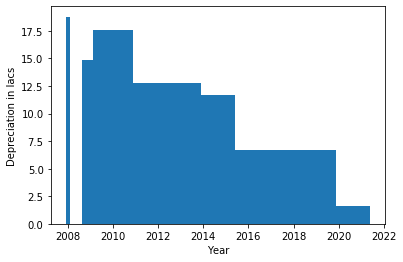

In [16]:
plt.bar(x = temp_2['Year'], height=temp_2['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

In [17]:
temp_3 = cars.loc[cars['Car_Name'] == 'verna']
temp_3.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
215,verna,2012,4.50,9.4,36100,Petrol,Dealer,Manual,0,4.90
218,verna,2014,6.45,9.4,45078,Petrol,Dealer,Manual,0,2.95
219,verna,2012,4.50,9.4,36000,Petrol,Dealer,Manual,0,4.90
223,verna,2015,8.25,9.4,61381,Diesel,Dealer,Manual,0,1.15
224,verna,2013,5.11,9.4,36198,Petrol,Dealer,Automatic,0,4.29


Text(0, 0.5, 'Depreciation in lacs')

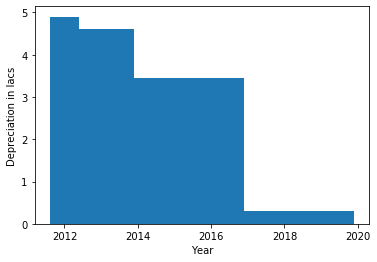

In [18]:
plt.bar(x = temp_3['Year'], height=temp_3['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

In [ ]:
The bar graph for verna and corolla altis gives us a more constant depreciation than city and fortuner, hence leaves us with a mixed idea of make year being the most important factor in depreciation

In [ ]:
Lets move to analyze other variables.

In [19]:
kms = cars[['Car_Name', 'Kms_Driven']]
kms.head()

,Car_Name,Kms_Driven
0,ritz,27000
1,sx4,43000
2,ciaz,6900
3,wagon r,5200
4,swift,42450


In [20]:
by_kms_driven = kms.groupby('Car_Name').mean().tail(30)
by_kms_driven.sort_values('Kms_Driven', ascending=False)

,Kms_Driven
Car_Name,
corolla,135154.000000
land cruiser,78000.000000
fortuner,62702.818182
innova,58713.111111
etios cross,54707.333333
corolla altis,54293.875000
dzire,54243.500000
etios liva,51500.000000
sx4,50740.000000


In [ ]:
Now let us study the depreciation kms has by using a few bar charts.

In [21]:
temp_4 = cars.loc[cars['Car_Name'] == 'city']
temp_4.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
251,city,2013,5.00,9.9,56701,Petrol,Dealer,Manual,0,4.90
253,city,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0,2.70
254,city,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0,4.65
256,city,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0,3.35
257,city,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0,5.10


Text(0, 0.5, 'Kms Driven')

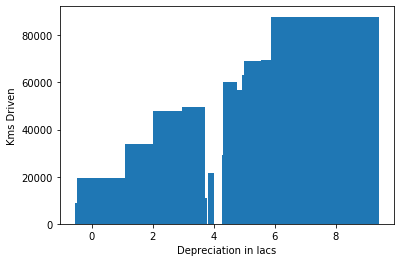

In [22]:
plt.bar(x = temp_4['depreciation'], height=temp_4['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [23]:
temp_5 = cars.loc[cars['Car_Name'] == 'fortuner']
temp_5.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,15.71
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,14.61
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0,15.97
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21


Text(0, 0.5, 'Kms Driven')

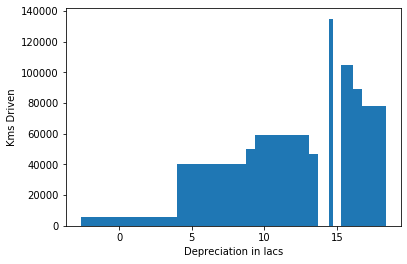

In [24]:
plt.bar(x = temp_5['depreciation'], height=temp_5['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [25]:
temp_6 = cars.loc[cars['Car_Name'] == 'corolla altis']
temp_6.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
55,corolla altis,2009,3.60,15.04,70000,Petrol,Dealer,Automatic,0,11.44
57,corolla altis,2010,4.75,18.54,50000,Petrol,Dealer,Manual,0,13.79
60,corolla altis,2013,6.95,18.61,40001,Petrol,Dealer,Manual,0,11.66
68,corolla altis,2011,4.35,13.74,88000,Petrol,Dealer,Manual,0,9.39
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0,6.66


Text(0, 0.5, 'Kms Driven')

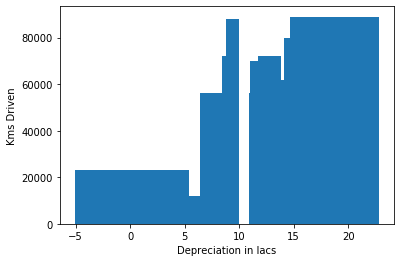

In [26]:
plt.bar(x = temp_6['depreciation'], height=temp_6['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [27]:
temp_7 = cars.loc[cars['Car_Name'] == 'verna']
temp_7.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
215,verna,2012,4.50,9.4,36100,Petrol,Dealer,Manual,0,4.90
218,verna,2014,6.45,9.4,45078,Petrol,Dealer,Manual,0,2.95
219,verna,2012,4.50,9.4,36000,Petrol,Dealer,Manual,0,4.90
223,verna,2015,8.25,9.4,61381,Diesel,Dealer,Manual,0,1.15
224,verna,2013,5.11,9.4,36198,Petrol,Dealer,Automatic,0,4.29


Text(0, 0.5, 'Kms Driven')

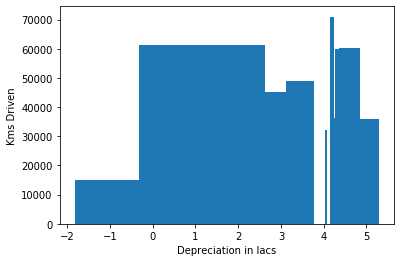

In [28]:
plt.bar(x = temp_7['depreciation'], height=temp_7['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [ ]:
The graphs above somewhat show a constant behaviour and hence cannot be the sole factor affecting depreciation.

Lets move ahead in analyzing other variables. But, at first we will use label encoder to change our categorical values to numerical ones.

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(cars['Fuel_Type'])
le.classes_

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [32]:
cars['Fuel_Type'] = le.transform(cars['Fuel_Type'])
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0,2.27


In [ ]:
Here we can see that Fuel Type '0' is CNG, '1' is Diesel and '2' is petrol.

In [33]:
le.fit(cars['Seller_Type'])
cars['Seller_Type'] = le.transform(cars['Seller_Type'])

In [34]:
le.classes_

array(['Dealer', 'Individual'], dtype=object)

In [35]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,2,0,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,2,0,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,2,0,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,1,0,Manual,0,2.27


In [ ]:
Furthermore, we see that here Seller_Type '0' is Dealer and '1' is Individual.

In [36]:
le.fit(cars['Transmission'])
cars['Transmission'] = le.transform(cars['Transmission'])
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,2,0,1,0,2.24
1,sx4,2013,4.75,9.54,43000,1,0,1,0,4.79
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,2.60
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,1.30
4,swift,2014,4.60,6.87,42450,1,0,1,0,2.27


In [ ]:
Here we can see that Transmission '0' is Automatic and '1' is Manual

In [37]:
by_fuel_type = cars[['Car_Name', 'Fuel_Type', 'depreciation']]
by_fuel_type.head()

,Car_Name,Fuel_Type,depreciation
0,ritz,2,2.24
1,sx4,1,4.79
2,ciaz,2,2.60
3,wagon r,2,1.30
4,swift,1,2.27


In [38]:
type_of_fuel = by_fuel_type.groupby('Fuel_Type').mean()
type_of_fuel.head()

,depreciation
Fuel_Type,
0,3.315000
1,5.536000
2,2.319372


In [ ]:
From this we make out that diesel cars have maximum depreciation. However, this is not concrete as other factors also plpay an important role is determining the depreciation.

In [39]:
by_seller_type = cars[['Car_Name', 'Seller_Type', 'depreciation']]
by_seller_type.head()

,Car_Name,Seller_Type,depreciation
0,ritz,0,2.24
1,sx4,0,4.79
2,ciaz,0,2.60
3,wagon r,0,1.30
4,swift,0,2.27


In [41]:
seller_t = by_seller_type.groupby('Seller_Type').mean()
seller_t.head()

,depreciation
Seller_Type,
0,4.164615
1,0.764340


In [ ]:
In addition, let us plot a few graphs that can explain a better relationship.

In [42]:
new_cars = cars[['Car_Name', 'Year', 'Kms_Driven', 'depreciation']]
new_cars.head()

,Car_Name,Year,Kms_Driven,depreciation
0,ritz,2014,27000,2.24
1,sx4,2013,43000,4.79
2,ciaz,2017,6900,2.60
3,wagon r,2011,5200,1.30
4,swift,2014,42450,2.27


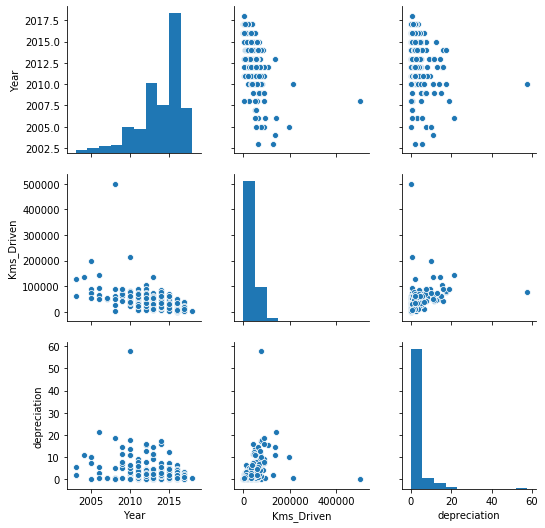

In [44]:
sns.pairplot(new_cars)

In [ ]:
From this graph we can say that both Year and Kms Driven are an important factor in determining depreciation.

In [ ]:
Furthermore, let us validate all possible variables that could determine depreciation

In [45]:
final_values = cars[['Car_Name', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'depreciation', 'Year', 'Transmission']]
final_values.head()

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,depreciation,Year,Transmission
0,ritz,27000,2,0,2.24,2014,1
1,sx4,43000,1,0,4.79,2013,1
2,ciaz,6900,2,0,2.60,2017,1
3,wagon r,5200,2,0,1.30,2011,1
4,swift,42450,1,0,2.27,2014,1


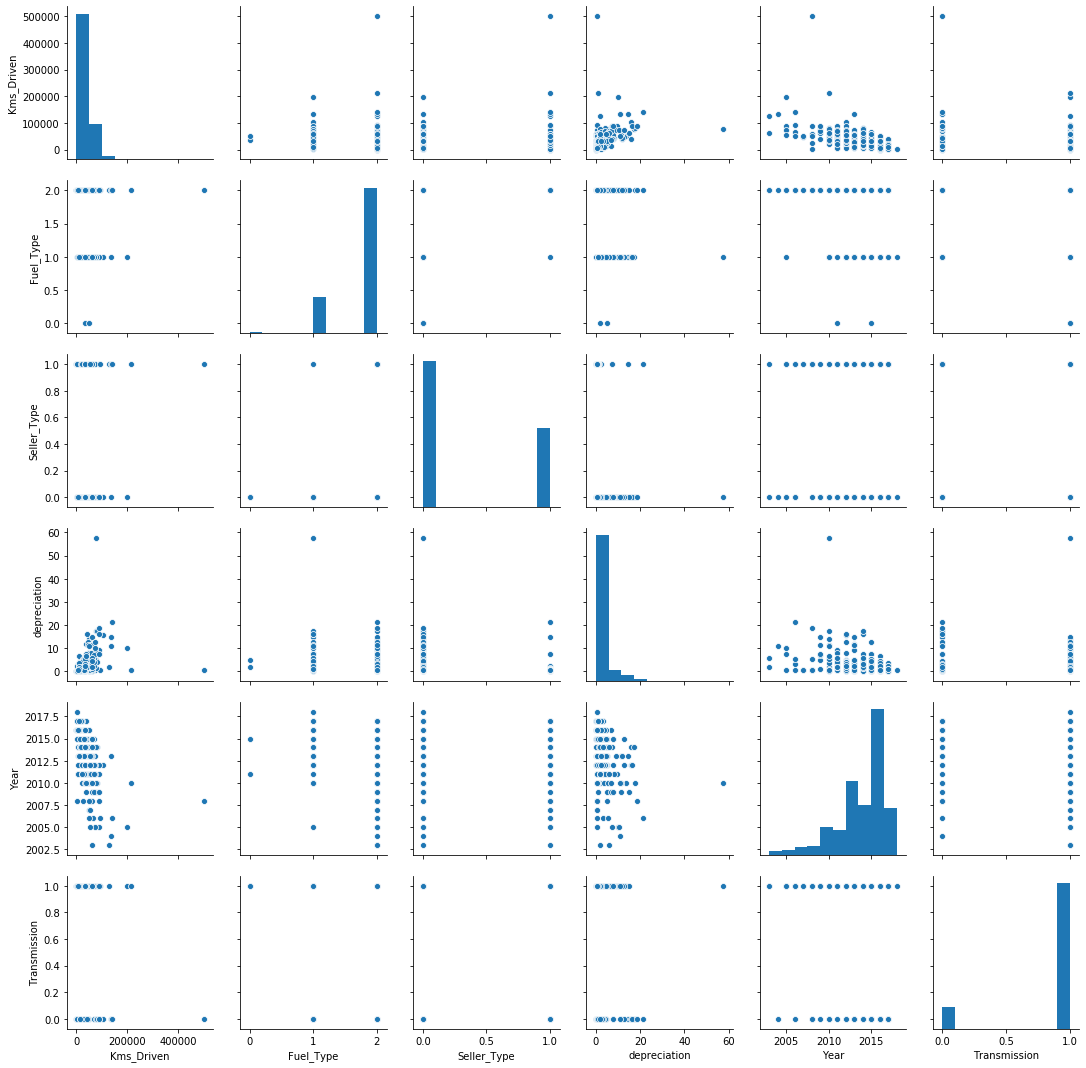

In [47]:
sns.pairplot(final_values)

In [ ]:
The above graph shows that variables such as Transmission and Seller_Type do not have much impact on depreciation as compared to Kms_Driver and Year.
Hence, we can conclude that Kms_driven and year have a hige impact on depreciation than other factors.